<a href="https://colab.research.google.com/github/federicapennino/Data_analysis/blob/LABS/Analyzing_Gender_Inequality_Index_Using_Regression_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing Gender Inequality Index Using Regression Models

This analysis examines the relationship between gender inequality (measured by the Gender Inequality Index - GII) and various socio-economic factors, including women's representation in parliament, female labor force participation, access to education, fertility rates, and life expectancy. By employing Ordinary Least Squares (OLS) and Random Forest regression models, the aim is to identify the key drivers of gender inequality and evaluate the predictive accuracy of linear and non-linear models. The feature importance is analyzed to understand the relative contribution of each variable.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


The dataset is sourced from the QoG database, which contains cross-country data on governance, socio-economic indicators, and development metrics. For this analysis, only countries with complete data on the selected variables are included. The following variables are used:

Proportion of seats held by women in national parliaments (wdi_wip): A measure of political representation.
Female labor force participation (wdi_lfpf): The percentage of women actively participating in the labor market.
Firms with female top managers (wdi_firftopm): An indicator of female leadership in the private sector.
Female literacy rate (wdi_litradf): Access to education for women.
Fertility rate (wdi_fertility): A measure of birth rates per woman.
Female life expectancy at birth (wdi_lifexpf): A proxy for overall health and development.
The dependent variable, Gender Inequality Index (gii_gii), quantifies gender-based disparities across health, empowerment, and labor participation.



In [ ]:
# import data
url = 'https://www.qogdata.pol.gu.se/data/qog_bas_cs_jan24.xlsx'
df = pd.read_excel(url)

df.head()

,ccode,cname,ccode_qog,cname_qog,ccodealp,ccodecow,version,ajr_settmort,atop_ally,atop_number,...,wvs_imprel,wvs_pmi12,wvs_psarmy,wvs_psdem,wvs_psexp,wvs_pssl,wvs_relacc,wvs_satfin,wvs_subh,wvs_trust
0,4,Afghanistan,4,Afghanistan,AFG,700.0,QoGBasCSjan24,4.540098,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,8,Albania,ALB,339.0,QoGBasCSjan24,NaN,1.0,8.0,...,2.869328,NaN,1.596485,3.849031,3.475513,1.744196,NaN,NaN,3.488758,0.027857
2,12,Algeria,12,Algeria,DZA,615.0,QoGBasCSjan24,4.359270,1.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,Andorra,20,Andorra,AND,232.0,QoGBasCSjan24,NaN,1.0,2.0,...,2.034930,2.710393,1.336049,3.681363,2.635721,1.830491,1.751004,6.561316,4.089642,0.255744
4,24,Angola,24,Angola,AGO,540.0,QoGBasCSjan24,5.634789,1.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

To predict the Gender Inequality Index (GII), the dataset is split into training and testing subsets, with 70% of the data used for training and 30% for testing. This ensures that the model can be evaluated on unseen data, preventing overfitting and improving generalizability.

In [ ]:
# Define independent variables (predictors) and dependent variable (GII)
# Predictors represent various socio-economic factors affecting gender inequality
df_cleaned = df.dropna(subset=['wdi_wip', 'wdi_lfpf', 'wdi_firftopm', 'wdi_litradf', 'wdi_fertility', 'wdi_lifexpf'])
X = df_cleaned[['wdi_wip','wdi_lfpf', 'wdi_firftopm', 'wdi_litradf', 'wdi_fertility', 'wdi_lifexpf']]
y = df_cleaned['gii_gii']

Model

The OLS regression model is employed to analyze the linear relationships between the predictors and the GII. It provides coefficients that indicate the magnitude and direction of the relationship for each predictor.


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)
y_pred = ols_model.predict(X_test)

print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))=

Mean Squared Error: 0.09200847776909762


In [ ]:
# Calculate and print the R-squared value
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.6327907824787775


The model achieved a Mean Squared Error (MSE) of 0.092, perhaps indicating a quite high level of accuracy in predicting gender equality. Without anything to compare this MSE to, it is not possible to say much about it. This just suggests that the model is somewhat able to capture the underlying relationships between the variables chosen and gender equality.

R-squared Value: The OLS model explained 63% of the variance in GII, indicating reasonably good fit.

Coefficient Interpretation

In [ ]:
coefficients = pd.Series(ols_model.coef_, index=X.columns)
coefficients

,0
wdi_wip,-0.005429
wdi_lfpf,-0.005914
wdi_firftopm,0.002510
wdi_litradf,-0.001580
wdi_fertility,-0.001016
wdi_lifexpf,-0.017994


5 out of 6 variables have a negative effect on gender inequlity:
1. Proportion of seats held by women in national parliaments (wdi_wip);
2. Female labor force participation (wdi_lfpf);
3. Access to education: Female literacy rate (wdi_litradf);
4. Fertility rate (wdi_fertility);
5. Female Life expectancy at birth (wdi_lifexpf)

and just one variable showed a positive relatonship:
Firms with female top managers (wdi_firftopm), suggesting that female leadership at the top level might not always correlate directly with broader reductions in inequality.


Random Forest Model

The Random Forest model, a non-linear ensemble learning method, is used to better capture complex relationships between predictors and GII. A grid search is conducted to optimize hyperparameters, such as the number of trees (n_estimators), tree depth (max_depth), and minimum samples per split (min_samples_split).

In [ ]:
rf1 = RandomForestRegressor()

n_estimators = [50, 100, 300] # how many trees are included, the ore the better
max_depth = [None, 1, 5] # how deep each tree goes, too much depth can cause overfitting
min_samples_split = [2, 5, 10] # min number of data in a group before the tree can split further
min_samples_leaf = [1, 2, 4] # min data point at the end of the tree

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1,
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

print("Best Parameters: %f using %s" % (bestF.best_score_, bestF.best_params_))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: 0.761589 using {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


Key results:

Best Parameters: The optimal model parameters were: 50 trees (n_estimators), a depth of 5 (max_depth), and a minimum of 5 samples per split (min_samples_split).

Running the best model and getting the mean-squared-error on tested data. Comparing the mean-squared-errors.

In [ ]:
rf_best = RandomForestRegressor(max_depth= 5, min_samples_split= 5, n_estimators= 50, min_samples_leaf=1)
rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

print('Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.06321831883042521


Mean Squared Error (MSE) of OLS: 0.092.
Mean Squared Error (MSE) random forest regressor: 0.066.

The Random Forest regressor  outperformed OLS in predicting accurately the outcome variable.


Comparing models' R-squared.

In [ ]:
# Calculate and print the R-squared value using the model's score method
r_squared = rf_best.score(X_test, y_test)
print('R-squared:', r_squared)

R-squared: 0.8266420479624859


R-squared OLS: 0.63
R-squared random forest regressor: 0.81

R-squared is a statistical measure that indicates how well a model explains the variance of the outcome variable and it ranges from 0 to 1. The random forest regressor R-squared is bigger and nearer to 1 than the OLS R squared. While both results are good in terms of explainability of the outcome variable variance, the second model only leaves 19% of unexplained variance, making it a better model. The result is not a surprise since the random forest model is able to capture relationships other than linear.


**Analyzing Feature Importances and Their Impact on Gender Inequality**

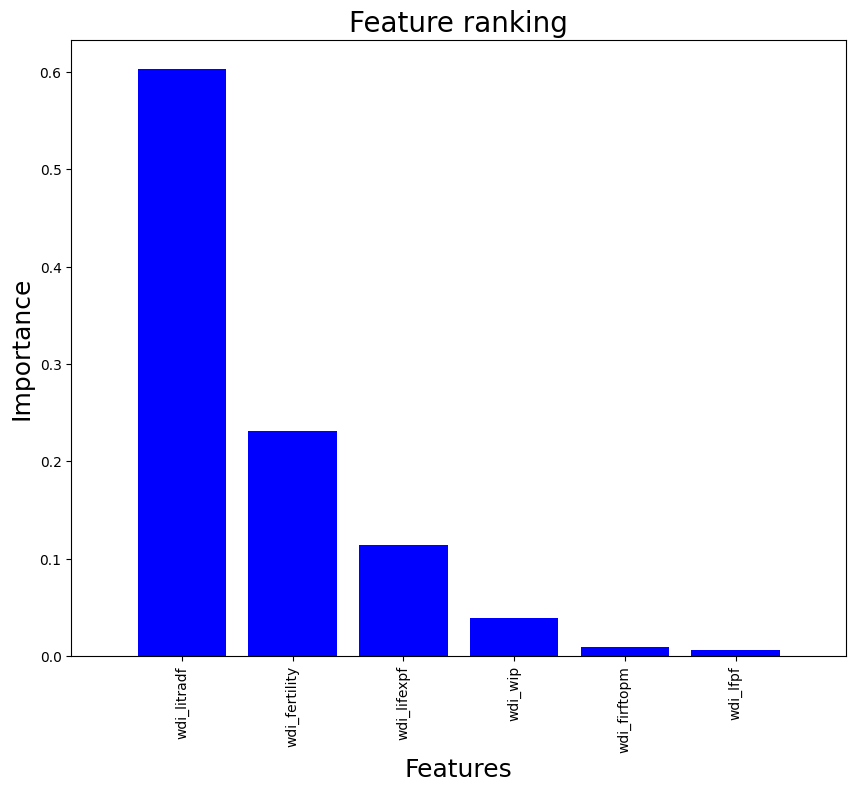

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# For rf_best as our trained Random Forest model
importance = rf_best.feature_importances_
indices = np.argsort(importance)[::-1]
feature_names = X.columns

f, ax = plt.subplots(figsize=(10, 8))
plt.title("Feature ranking", fontsize=20)
plt.bar(range(X.shape[1]), importance[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Use indices to sort feature names
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importance", fontsize=18)
plt.xlabel("Features", fontsize=18)
plt.show()

This section evaluates the relative importance of each predictor variable in the Random Forest model. Feature importance quantifies the contribution of each variable to the model's predictions, helping identify the most influential factors driving gender inequality.

Key Results

Female Literacy Rate (wdi_litradf): This emerged as the most significant predictor, emphasizing the role of education in reducing gender inequality. Policies focused on improving female literacy are likely to have a substantial impact.
Fertility Rate (wdi_fertility): The second most important factor, indicating the importance of demographic factors in shaping gender-related disparities.
Female Labor Force Participation (wdi_lfpf): While often cited as a critical factor, its lower importance suggests that other socio-economic conditions might moderate its effects.
Visual Representation

A bar chart of feature importances provides a clear visualization of the ranking, showcasing the dominance of education and fertility in predicting the Gender Inequality Index.

Implications

This analysis highlights that while some variables, such as female literacy and fertility, have strong direct effects, others like female life expectancy and top-level leadership have limited influence, potentially due to broader structural or cultural factors.

It is also possible to view the same result as a table as follows:

In [ ]:
feature_importances = rf_best.feature_importances_
feature_names = X.columns  # Assuming X is a DataFrame

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
print(feature_importances_df)

         Feature  Importance
3    wdi_litradf    0.602871
4  wdi_fertility    0.230867
5    wdi_lifexpf    0.113577
0        wdi_wip    0.038433
2   wdi_firftopm    0.008634
1       wdi_lfpf    0.005618


The Random Forest model provides insights into the relative importance of predictors for explaining gender inequality. The table highlights the contribution of each variable to the predictive power of the model:

Access to Education (wdi_litradf): The most critical factor, accounting for 60.3% of the model's predictive power, emphasizes the pivotal role of female literacy in reducing gender disparities. Investments in education are likely to have a transformative impact on gender inequality.
Fertility Rate (wdi_fertility): The second most important variable (23.1%) indicates that lower fertility rates are strongly associated with reduced gender inequality, reflecting demographic and socio-economic dynamics.
Female Life Expectancy (wdi_lifexpf): Though important (11.4%), its influence may be moderated by other factors such as healthcare access and quality.
Other Variables: Proportion of seats held by women in parliament (wdi_wip), firms with female top managers (wdi_firftopm), and female labor force participation (wdi_lfpf) contributed less to the model, suggesting their indirect or limited impact.
Observations

Low Importance of **Female Top Managers**: This conclusion aligns with previous findings that countries with high gender inequality can still have women in leadership roles. This may stem from social status segregation, where opportunities for leadership are often accessible only to a privileged minority of women, without addressing broader inequality.
**Life Expectancy**: The relatively low importance of life expectancy might result from its universal nature in countries with widespread access to healthcare systems. In such contexts, gender disparities in life expectancy are less pronounced, reducing its predictive power for gender inequality.

The analysis underscores the critical need to prioritize education and demographic policies in addressing gender inequality. While other variables contribute to the overall model, they may be less direct drivers or reflective of broader structural challenge


